# Latihan 1

In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import LeaveOneOut, cross_val_score

In [65]:
data = {
    'Temperatur': [10, 25, 15, 20, 18, 20, 22, 24],
    'Kecepatan_Angin': [0, 0, 5, 3, 7, 10, 5, 6],
    'Persepsi': ['Dingin', 'Panas', 'Dingin', 'Panas', 'Dingin', 'Dingin', 'Panas', 'Panas']
}

df_latian1 = pd.DataFrame(data)
print("=== Data Latih ===")
print(df_latian1)
print("-" * 30)

=== Data Latih ===
   Temperatur  Kecepatan_Angin Persepsi
0          10                0   Dingin
1          25                0    Panas
2          15                5   Dingin
3          20                3    Panas
4          18                7   Dingin
5          20               10   Dingin
6          22                5    Panas
7          24                6    Panas
------------------------------


In [67]:
X_latian1 = df_latian1[['Temperatur', 'Kecepatan_Angin']].values
y_latian1 = df_latian1['Persepsi'].values
test_point = np.array([[16, 3]])


In [70]:
k_prediksi = 3
knn = KNeighborsClassifier(n_neighbors=k_prediksi)
knn.fit(X_latian1, y_latian1)

hasil_prediksi = knn.predict(test_point)

print(f"\n>>> HASIL PREDIKSI")
print(f"Data Test: Temperatur 16, Angin 3")
print(f"Dengan k={k_prediksi}, Persepsi Marry adalah: {hasil_prediksi[0].upper()}")


>>> HASIL PREDIKSI
Data Test: Temperatur 16, Angin 3
Dengan k=3, Persepsi Marry adalah: DINGIN


In [69]:
k_range = [1, 3, 5, 7] # Mencoba nilai k ganjil
best_k = 0
best_score = 0

print("Hasil Validasi Akurasi:")
for k in k_range:
    # Buat model KNN
    model = KNeighborsClassifier(n_neighbors=k)

    cv = LeaveOneOut()
    scores = cross_val_score(model, X_latian1, y_latian1, cv=cv, scoring='accuracy')
    rata_rata_akurasi = scores.mean()

    print(f"k = {k} -> Akurasi: {rata_rata_akurasi*100:.0f}%")

    if rata_rata_akurasi > best_score:
        best_score = rata_rata_akurasi
        best_k = k

print(f"\nKesimpulan: Nilai k yang paling tepat berdasarkan akurasi terbaik adalah k = {best_k}")

Hasil Validasi Akurasi:
k = 1 -> Akurasi: 100%
k = 3 -> Akurasi: 75%
k = 5 -> Akurasi: 75%
k = 7 -> Akurasi: 0%

Kesimpulan: Nilai k yang paling tepat berdasarkan akurasi terbaik adalah k = 1


# Latihan 2

In [30]:
import pandas as pd
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
import matplotlib.pyplot as plt

In [71]:
data = {
    'Nim': ['TI001', 'TI002', 'TI003', 'TI004', 'TI005', 'TI006', 'TI007', 'TI008', 'TI009', 'TI010'],
    'Hasil_Sebenarnya': ['Lulus', 'Lulus', 'Lulus', 'Lulus', 'Lulus', 'Tidak Lulus', 'Tidak Lulus', 'Tidak Lulus', 'Tidak Lulus', 'Tidak Lulus'],
    'Hasil_Prediksi':   ['Lulus', 'Lulus', 'Lulus', 'Tidak Lulus', 'Tidak Lulus', 'Lulus', 'Tidak Lulus', 'Tidak Lulus', 'Tidak Lulus', 'Tidak Lulus']
}

df_latian2 = pd.DataFrame(data)

In [72]:
df_latian2['Actual'] = df_latian2['Hasil_Sebenarnya'].map({'Lulus':1, 'Tidak Lulus':0})
df_latian2['Pred'] = df_latian2['Hasil_Prediksi'].map({'Lulus':1, 'Tidak Lulus':0})

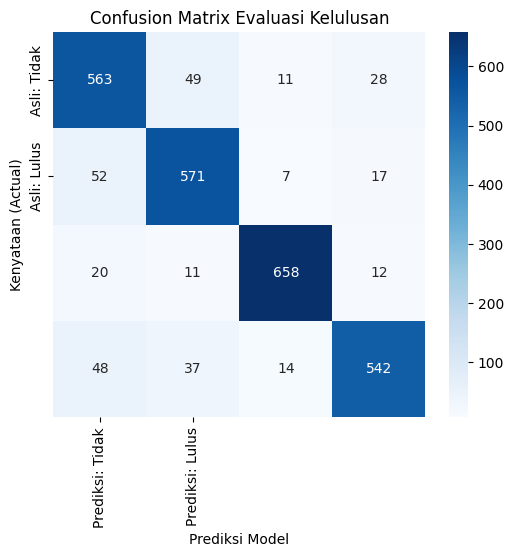

In [73]:

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Prediksi: Tidak', 'Prediksi: Lulus'],
            yticklabels=['Asli: Tidak', 'Asli: Lulus'])
plt.title('Confusion Matrix Evaluasi Kelulusan')
plt.ylabel('Kenyataan (Actual)')
plt.xlabel('Prediksi Model')
plt.show()

In [76]:

acc = accuracy_score(df_latian2['Actual'], df_latian2['Pred'])
prec = precision_score(df_latian2['Actual'], df_latian2['Pred'])
rec = recall_score(df_latian2['Actual'], df_latian2['Pred'])

print("\nAccuracy :", round(acc*100,2), "%")
print("Precision:", round(prec*100,2), "%")
print("Recall   :", round(rec*100,2), "%")


Accuracy : 70.0 %
Precision: 75.0 %
Recall   : 60.0 %


# Latihan 3


In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder

In [77]:
from google.colab import drive
drive.mount('/content/gdrive')

# Tentukan path file (sesuaikan dengan lokasi folder Anda di Drive)
path = "/content/gdrive/MyDrive/Praktikum/Praktikum 10/Data"


df_latian3 = pd.read_csv(path + '/weather_classification_data (2).csv')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [88]:
le = LabelEncoder()

# Buat salinan dataframe agar data asli tetap terbaca
df_latian3 = df_latian3.copy()

# Daftar kolom yang perlu diubah jadi angka
cols_to_encode = ['Cloud Cover', 'Season', 'Location', 'Weather Type']

print("--- Peta Pengubahan (Encoding) ---")
for col in cols_to_encode:
    # Fit & Transform: Mempelajari teks lalu mengubahnya jadi angka 0, 1, 2...
    df_latian3[col] = le.fit_transform(df_latian3[col])


display(df_latian3.head())

--- Peta Pengubahan (Encoding) ---


,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type
0,14.0,73,9.5,82.0,3,1010.82,2,3,3.5,1,1
1,39.0,96,8.5,71.0,3,1011.43,7,1,10.0,1,0
2,30.0,64,7.0,16.0,0,1018.72,5,1,5.5,2,3
3,38.0,83,1.5,82.0,0,1026.25,7,1,1.0,0,3
4,27.0,74,17.0,66.0,2,990.67,1,3,2.5,2,1


In [89]:
# X = Semua kolom KECUALI 'Weather Type'
X_latian3 = df_latian3.drop('Weather Type', axis=1)
# y = Kolom 'Weather Type' saja (Target)
y_latian3 = df_latian3['Weather Type']

In [85]:
model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_latian3, y_latian3)

KNeighborsClassifier(n_neighbors=3)

In [96]:
X_train, X_test, y_train, y_test = train_test_split(X_latian3, y_latian3, test_size=0.2, random_state=42)

# Latih ulang model hanya dengan data Training
model.fit(X_train, y_train)

# Prediksi jawaban untuk data Ujian
y_pred = model.predict(X_test)

In [97]:
print("=== HASIL EVALUASI MODEL ===")
print(f"Akurasi: {accuracy_score(y_test, y_pred) * 100}%\n")

=== HASIL EVALUASI MODEL ===
Akurasi: 88.4090909090909%



In [98]:
from sklearn.metrics import classification_report

all_labels = range(len(le.classes_))

print("Laporan Lengkap:")
# Tambahkan parameter 'labels=all_labels' dan 'zero_division=0' agar tidak error
print(classification_report(y_test, y_pred,
                            labels=all_labels,
                            target_names=le.classes_.astype(str),
                            zero_division=0))

Laporan Lengkap:
              precision    recall  f1-score   support

      Cloudy       0.82      0.86      0.84       651
       Rainy       0.85      0.88      0.87       647
       Snowy       0.95      0.94      0.95       701
       Sunny       0.90      0.85      0.87       641

    accuracy                           0.88      2640
   macro avg       0.88      0.88      0.88      2640
weighted avg       0.89      0.88      0.88      2640



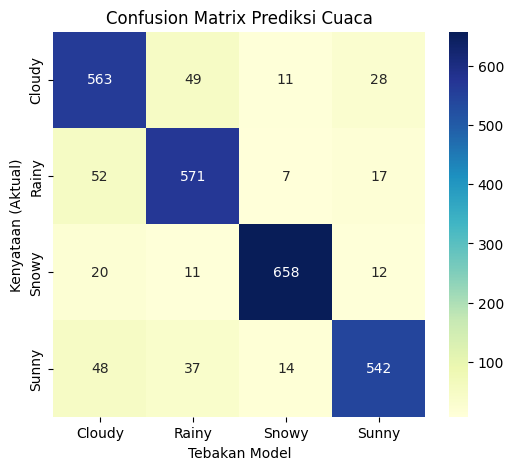

In [99]:
cm = confusion_matrix(y_test, y_pred, labels=all_labels)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu',
            xticklabels=le.classes_,
            yticklabels=le.classes_)
plt.title('Confusion Matrix Prediksi Cuaca')
plt.xlabel('Tebakan Model')
plt.ylabel('Kenyataan (Aktual)')
plt.show()